In [1]:
# Here is a simpler example of the use of LIME for image classification by using Keras (v2 or greater)

import os
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.config.set_visible_devices([], 'GPU')
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
import numpy as np

2025-06-08 12:01:50.619447: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-08 12:01:52.268309: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-08 12:01:52.275183: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-08 12:01:55.064664: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# set image path to generate the explanation for a label
label = 919 # replace with label number from inception class labels
image_path = './street_sign.jpg'


In [3]:
# # Using Inception
# Here we create a standard InceptionV3 pretrained model and use it on images by first preprocessing them with the preprocessing tools
inet_model = inc_net.InceptionV3()

def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)


Instructions for updating:
Colocations handled automatically by placer.


2025-06-08 12:02:07.302520: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2025-06-08 12:02:07.841186: W tensorflow/c/c_api.cc:304] Operation '{name:'batch_normalization_91/moving_variance/Assign' id:5441 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_91/moving_variance/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_91/moving_variance, batch_normalization_91/moving_variance/Initializer/ones)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


/home/ubuntu/setup/ai-sec-env/lib/python3.8/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2025-06-08 12:02:09.876784: W tensorflow/c/c_api.cc:304] Operation '{name:'predictions/Softmax' id:5621 op device:{requested: '', assigned: ''} def:{{{node predictions/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](predictions/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Top 5 predictions
('n06794110', 'street_sign', 0.97997767)
('n03976657', 'pole', 0.01009878)
('n06874185', 'traffic_light', 0.0023535066)
('n03891332', 'parking_meter', 0.0023370073)
('n03710193', 'mailbox', 0.00084387354)


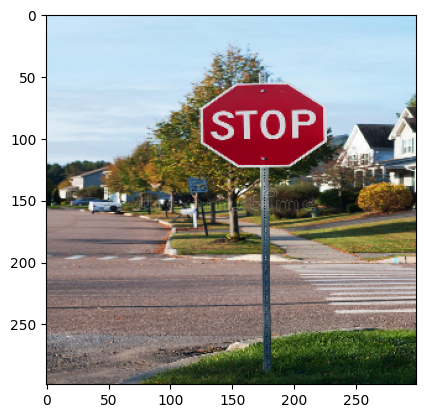

In [4]:
## Let's see the top 5 prediction for some image
images = transform_img_fn([image_path])
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
print("Top 5 predictions")
for x in decode_predictions(preds)[0]:
    print(x)


  0%|          | 0/1000 [00:00<?, ?it/s]

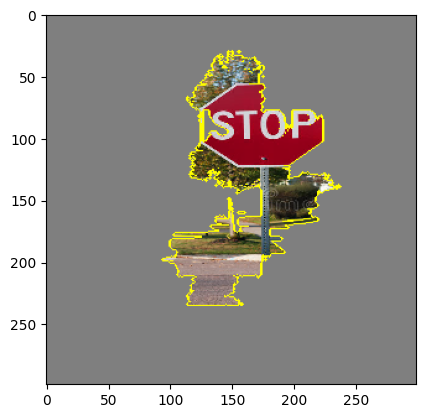

In [5]:
## Explanation
# Now let's get an explanation
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(images[0], inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)


from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()
